In [34]:
from typing import List, Any
import numpy as np
import json
import joblib
from PIL import Image
import requests
import onnxruntime as rt
import grpc
from onnx import numpy_helper
from google.protobuf.json_format import MessageToJson
from src.proto import predict_pb2, onnx_ml_pb2, prediction_service_pb2_grpc

from pydantic import BaseModel
from src.ml.transformers import PytorchImagePreprocessTransformer, SoftmaxTransformer

In [4]:
class Data(BaseModel):
    data: Any

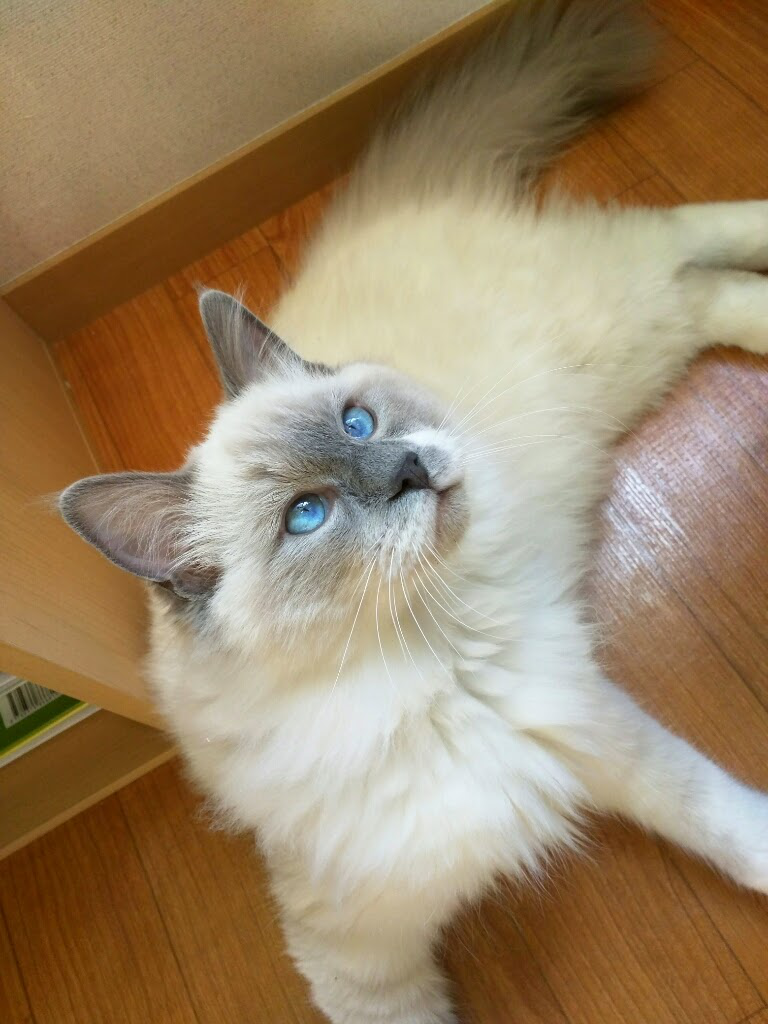

In [5]:
img = Image.open("data/cat.jpg")
img

In [8]:
preprocess_transformer = PytorchImagePreprocessTransformer()

In [29]:
pimg = preprocess_transformer.transform(img)

In [9]:
softmax_transformer = SoftmaxTransformer()

In [26]:
prediction_service_pb2.predict__pb2

<module 'src.proto.predict_pb2' from '/Users/shibuiyuusuke/book/ml-system-in-actions/chapter4_serving_patterns/prep_pred_pattern/src/proto/predict_pb2.py'>

In [35]:
serving_address = "localhost:50051"
channel = grpc.insecure_channel(serving_address)
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [28]:
request = predict_pb2.PredictRequest()

In [36]:
input_tensor = onnx_ml_pb2.TensorProto()
input_tensor.dims.extend(pimg.shape)
input_tensor.data_type = 1
input_tensor.raw_data = pimg.tobytes()

request_message = predict_pb2.PredictRequest()
request_message.inputs['input'].data_type = input_tensor.data_type
request_message.inputs['input'].dims.extend(pimg.shape)
request_message.inputs['input'].raw_data = input_tensor.raw_data

In [47]:
response = stub.Predict(request_message)
response

outputs {
  key: "output"
  value {
    dims: 1
    dims: 1000
    data_type: 1
    raw_data: "\252\327J\300\001\327\376\277\006\262\366\277\324\033\356\2770\217\254\277\331\301[\277\247\0240\277} G\277P\346X\277ie\016\300e=(\300\210\213O\300oj\375\277\242\024\354\277\323\312<\300\020\215\261\277\316iS?\330\003?@xL\221\277\357\254U\277#\206G?\033\272\221\2771\247\025\300\303\2123\277n\253\322\277\341-^\300\274\230\240\300\201\213q\300+\333-\300.u\022\300}\3401\300\023\277M\300\242\307h\300\3109\002\300\352`n\277CO\022\300\220\031\253\277\265\266\317\277\303\007\023\300\277[%\300\317\337\367\277\030\022\030\300I\201+\300\341\315\336\277\274hc\277\3306&\300\355<\007\300\007\246\003\300\262\230\220\300@\221i\300}\033A\300\200p\034?\327\327C\300\213C3\300\256\275\336\277\016WL\300\261\333\310\277cc\233\300;\315\357\277f\352\275\277b\347\253\277X\322\330\277\013=\001\300\242\301:\300\240d\"\300=\333\201\300\273\251\231\276G\317\344\277C6\022\300\252\007\305\277W\257J\3009\346\255\2775\344 \

In [48]:
r = np.frombuffer(response.outputs["output"].raw_data, dtype=np.float32)
r

array([-3.16941309e+00, -1.99093640e+00, -1.92730784e+00, -1.86022425e+00,
       -1.34811974e+00, -8.58426630e-01, -6.87815130e-01, -7.77839482e-01,
       -8.47264290e-01, -2.22493958e+00, -2.62874722e+00, -3.24289131e+00,
       -1.97981060e+00, -1.84437966e+00, -2.94987941e+00, -1.38711739e+00,
        8.25833201e-01,  2.98460960e+00, -1.13514614e+00, -8.34670007e-01,
        7.79390514e-01, -1.13849199e+00, -2.33832955e+00, -7.01336086e-01,
       -1.64585662e+00, -3.47155023e+00, -5.01864433e+00, -3.77413964e+00,
       -2.71650195e+00, -2.28840208e+00, -2.77932668e+00, -3.21478724e+00,
       -3.63718462e+00, -2.03477669e+00, -9.31166291e-01, -2.28608775e+00,
       -1.33671761e+00, -1.62276328e+00, -2.29734874e+00, -2.58372474e+00,
       -1.93651760e+00, -2.37610435e+00, -2.67976594e+00, -1.74065793e+00,
       -8.88316870e-01, -2.59709740e+00, -2.11309361e+00, -2.05700850e+00,
       -4.51863956e+00, -3.64949036e+00, -3.01730275e+00,  6.11091614e-01,
       -3.06004882e+00, -

In [49]:
s = softmax_transformer.transform(r)
s

array([[3.86916810e-07, 1.25725626e-06, 1.33985304e-06, 1.43281818e-06,
        2.39108726e-06, 3.90181140e-06, 4.62766866e-06, 4.22926541e-06,
        3.94561039e-06, 9.94941388e-07, 6.64394634e-07, 3.59506402e-07,
        1.27132193e-06, 1.45570243e-06, 4.81903385e-07, 2.29963553e-06,
        2.10247726e-05, 1.82085714e-04, 2.95861696e-06, 3.99561623e-06,
        2.00706454e-05, 2.94873530e-06, 8.88286195e-07, 4.56551834e-06,
        1.77537402e-06, 2.86023294e-07, 6.08845099e-08, 2.11343306e-07,
        6.08575533e-07, 9.33762124e-07, 5.71518456e-07, 3.69753224e-07,
        2.42363342e-07, 1.20332834e-06, 3.62807168e-06, 9.35924902e-07,
        2.41850694e-06, 1.81685016e-06, 9.25444567e-07, 6.94990604e-07,
        1.32757009e-06, 8.55356916e-07, 6.31348200e-07, 1.61479852e-06,
        3.78691175e-06, 6.85758721e-07, 1.11268355e-06, 1.17687102e-06,
        1.00382081e-07, 2.39399299e-07, 4.50483128e-07, 1.69617288e-05,
        4.31632316e-07, 5.59266141e-07, 1.61559649e-06, 3.779682

In [59]:
class Classifier(object):
    def __init__(
        self,
        stub,
        label_path: str = "data/image_net_labels.json",
        onnx_input_name: str = "input",
        onnx_output_name: str = "output",
    ):
        self.stub = stub
        self.preprocess_transformer = PytorchImagePreprocessTransformer()
        self.softmax_transformer = SoftmaxTransformer()

        self.label_path = label_path
        self.label: List[str] = []

        self.onnx_input_name: str = onnx_input_name
        self.onnx_output_name: str = onnx_output_name

        self.load_label()

    def load_label(self):
        with open(self.label_path, "r") as f:
            self.label = json.load(f)

    def predict(self, data: Image) -> List[float]:
        preprocessed = self.preprocess_transformer.transform(data)

        input_tensor = onnx_ml_pb2.TensorProto()
        input_tensor.dims.extend(preprocessed.shape)
        input_tensor.data_type = 1
        input_tensor.raw_data = preprocessed.tobytes()

        request_message = predict_pb2.PredictRequest()
        request_message.inputs[self.onnx_input_name].data_type = input_tensor.data_type
        request_message.inputs[self.onnx_input_name].dims.extend(preprocessed.shape)
        request_message.inputs[self.onnx_input_name].raw_data = input_tensor.raw_data

        response = self.stub.Predict(request_message)
        output = np.frombuffer(response.outputs[self.onnx_output_name].raw_data, dtype=np.float32)
        
        softmax = self.softmax_transformer.transform(output).tolist()

        print(f"predict proba {softmax}")
        return softmax

    def predict_label(self, data: Image) -> str:
        softmax = self.predict(data=data)
        argmax = int(np.argmax(np.array(softmax)[0]))
        return self.label[argmax]

In [60]:
cls = Classifier(stub=stub)

In [61]:
cls.predict_label(img)

predict proba [[3.869168097025977e-07, 1.2572562582136015e-06, 1.3398530427366495e-06, 1.4328181805467466e-06, 2.3910872641863534e-06, 3.901811396644916e-06, 4.62766865894082e-06, 4.229265414323891e-06, 3.945610387745546e-06, 9.949413879439817e-07, 6.643946335316286e-07, 3.595064015371463e-07, 1.271321934837033e-06, 1.4557024314854061e-06, 4.819033847525134e-07, 2.2996355255600065e-06, 2.102477264998015e-05, 0.00018208571418654174, 2.9586169603135204e-06, 3.995616225438425e-06, 2.0070645405212417e-05, 2.9487353003787575e-06, 8.882861948222853e-07, 4.565518338495167e-06, 1.775374016688147e-06, 2.8602329393834225e-07, 6.08845098781785e-08, 2.1134330552285974e-07, 6.085755330786924e-07, 9.337621236227278e-07, 5.715184556720487e-07, 3.69753223594671e-07, 2.42363341840246e-07, 1.2033283383061644e-06, 3.6280716813053004e-06, 9.359249020235438e-07, 2.418506937829079e-06, 1.8168501583204488e-06, 9.254445672013389e-07, 6.949906037334586e-07, 1.3275700894155307e-06, 8.55356915963057e-07, 6.31348

'Siamese cat'